In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(type(x_train))
print(x_train.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)


In [4]:
print('Training data shape   : ', x_train.shape)
print('Training labels shape : ', y_train.shape)
print('Testing data shape    : ', x_test.shape)
print('Testing labels shape  : ', y_test.shape)

Training data shape   :  (60000, 28, 28)
Training labels shape :  (60000,)
Testing data shape    :  (10000, 28, 28)
Testing labels shape  :  (10000,)


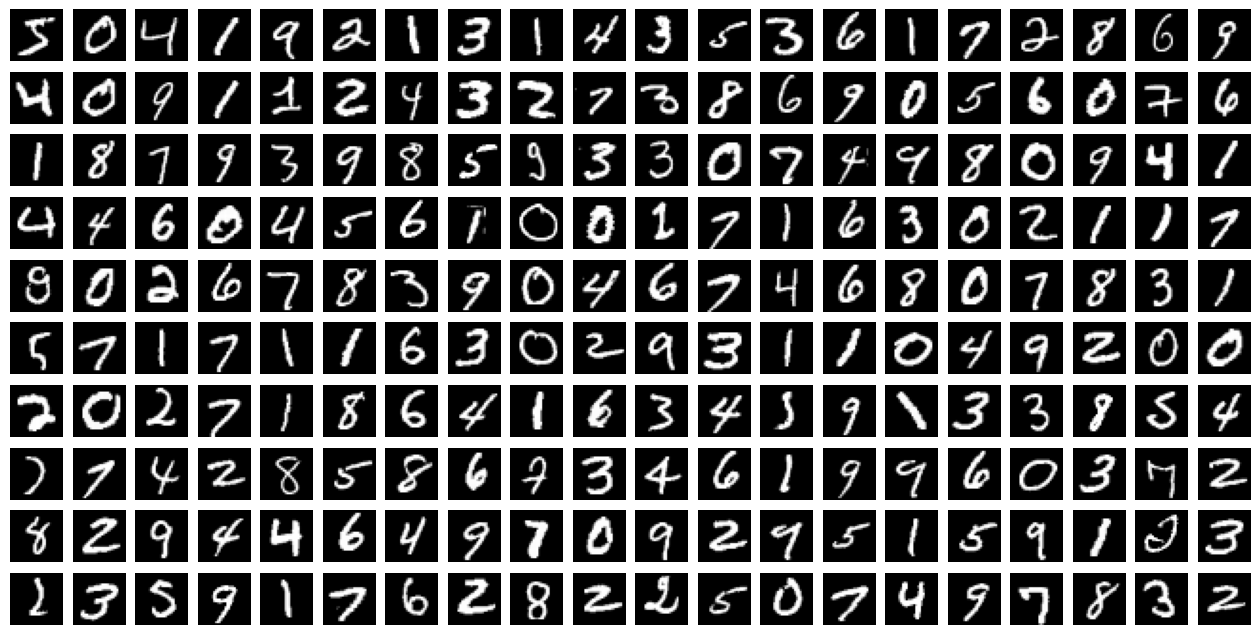

In [5]:
plt.figure(figsize = (16,8))
for i in range(200):
  plt.subplot(10,20,i+1)
  plt.axis('off')
  plt.imshow(x_train[i], cmap = 'gray')

In [6]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_test  = to_categorical(y_test,  num_classes = 10)

x_train = x_train.reshape(60000, 28 ,28, 1)
x_test  = x_test.reshape(10000, 28, 28, 1)

print('Training data shape   : ', x_train.shape)
print('Training labels shape : ', y_train.shape)
print('Testing data shape    : ', x_test.shape)
print('Testing labels shape  : ', y_test.shape)

Training data shape   :  (60000, 28, 28, 1)
Training labels shape :  (60000, 10)
Testing data shape    :  (10000, 28, 28, 1)
Testing labels shape  :  (10000, 10)


## Data Augmentation

In [7]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    width_shift_range = 0.1,
    height_shift_range = 0.1
    # rotation_range = 10,
    # shear_range = 10,
    # horizontal_flip = True,
    # vertical_flip = True
)

train_datagen.fit(x_train)
train_generator = train_datagen.flow(x_train, y_train, batch_size = 1000)

In [8]:
val_datagen = ImageDataGenerator(rescale = 1/255)
val_datagen.fit(x_test)
val_generator = val_datagen.flow(x_test, y_test)

## Callbacks

In [38]:
# Stop the training  when accuracy is more than threshold accuracy
from keras.callbacks import Callback

threshold_accuracy = 0.98

class MyCallback(Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs['accuracy'] > threshold_accuracy:
      print('\nThe model has achieved the threshold accuracy of 0.98, hence stopping the training')
      self.model.stop_training = True

my_callback = MyCallback()

In [40]:
# Learning rate reduction
from keras.callbacks import ReduceLROnPlateau
lr_reduction = ReduceLROnPlateau(monitor = 'accuracy',
                                 patience = 2,
                                 factor = 0.5,
                                 verbose = 1)

# Steps to create and train a neural network
1. Create the architecture
2. Compile the model
3. Fit the model

In [41]:
# Creating the architecture
'''
model = tf.keras.models.Sequential([
    Flatten(input_shape = (28,28)),
    Dense(200, activation = 'relu'),
    Dense(100, activation = 'relu'),
    Dense(10, activation = 'softmax')
])
'''

model = tf.keras.models.Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(300, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10,  activation = 'softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 300)               235500    
                                                                 
 dense_14 (Dense)            (None, 200)               60200     
                                                                 
 dense_15 (Dense)            (None, 100)               20100     
                                                                 
 dense_16 (Dense)            (None, 10)                1010      
                                                                 
Total params: 316,810
Trainable params: 316,810
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Compiling the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])

In [43]:
# Fit the model
history = model.fit(
          train_generator,
          validation_data = (val_generator),
          epochs = 100,
          verbose = 1,
          callbacks = [lr_reduction, my_callback])

Epoch 1/100
60/60 [==============================] - 17s 257ms/step - loss: 0.9740 - accuracy: 0.7100 - val_loss: 0.2865 - val_accuracy: 0.9225 - lr: 0.0010
Epoch 2/100
60/60 [==============================] - 16s 260ms/step - loss: 0.3285 - accuracy: 0.9036 - val_loss: 0.1829 - val_accuracy: 0.9477 - lr: 0.0010
Epoch 3/100
60/60 [==============================] - 16s 272ms/step - loss: 0.2205 - accuracy: 0.9348 - val_loss: 0.1252 - val_accuracy: 0.9627 - lr: 0.0010
Epoch 4/100
60/60 [==============================] - 18s 296ms/step - loss: 0.1796 - accuracy: 0.9470 - val_loss: 0.1112 - val_accuracy: 0.9677 - lr: 0.0010
Epoch 5/100
60/60 [==============================] - 15s 258ms/step - loss: 0.1513 - accuracy: 0.9543 - val_loss: 0.0986 - val_accuracy: 0.9691 - lr: 0.0010
Epoch 6/100
60/60 [==============================] - 15s 258ms/step - loss: 0.1345 - accuracy: 0.9590 - val_loss: 0.0959 - val_accuracy: 0.9692 - lr: 0.0010
Epoch 7/100
60/60 [==============================] - 16s 2

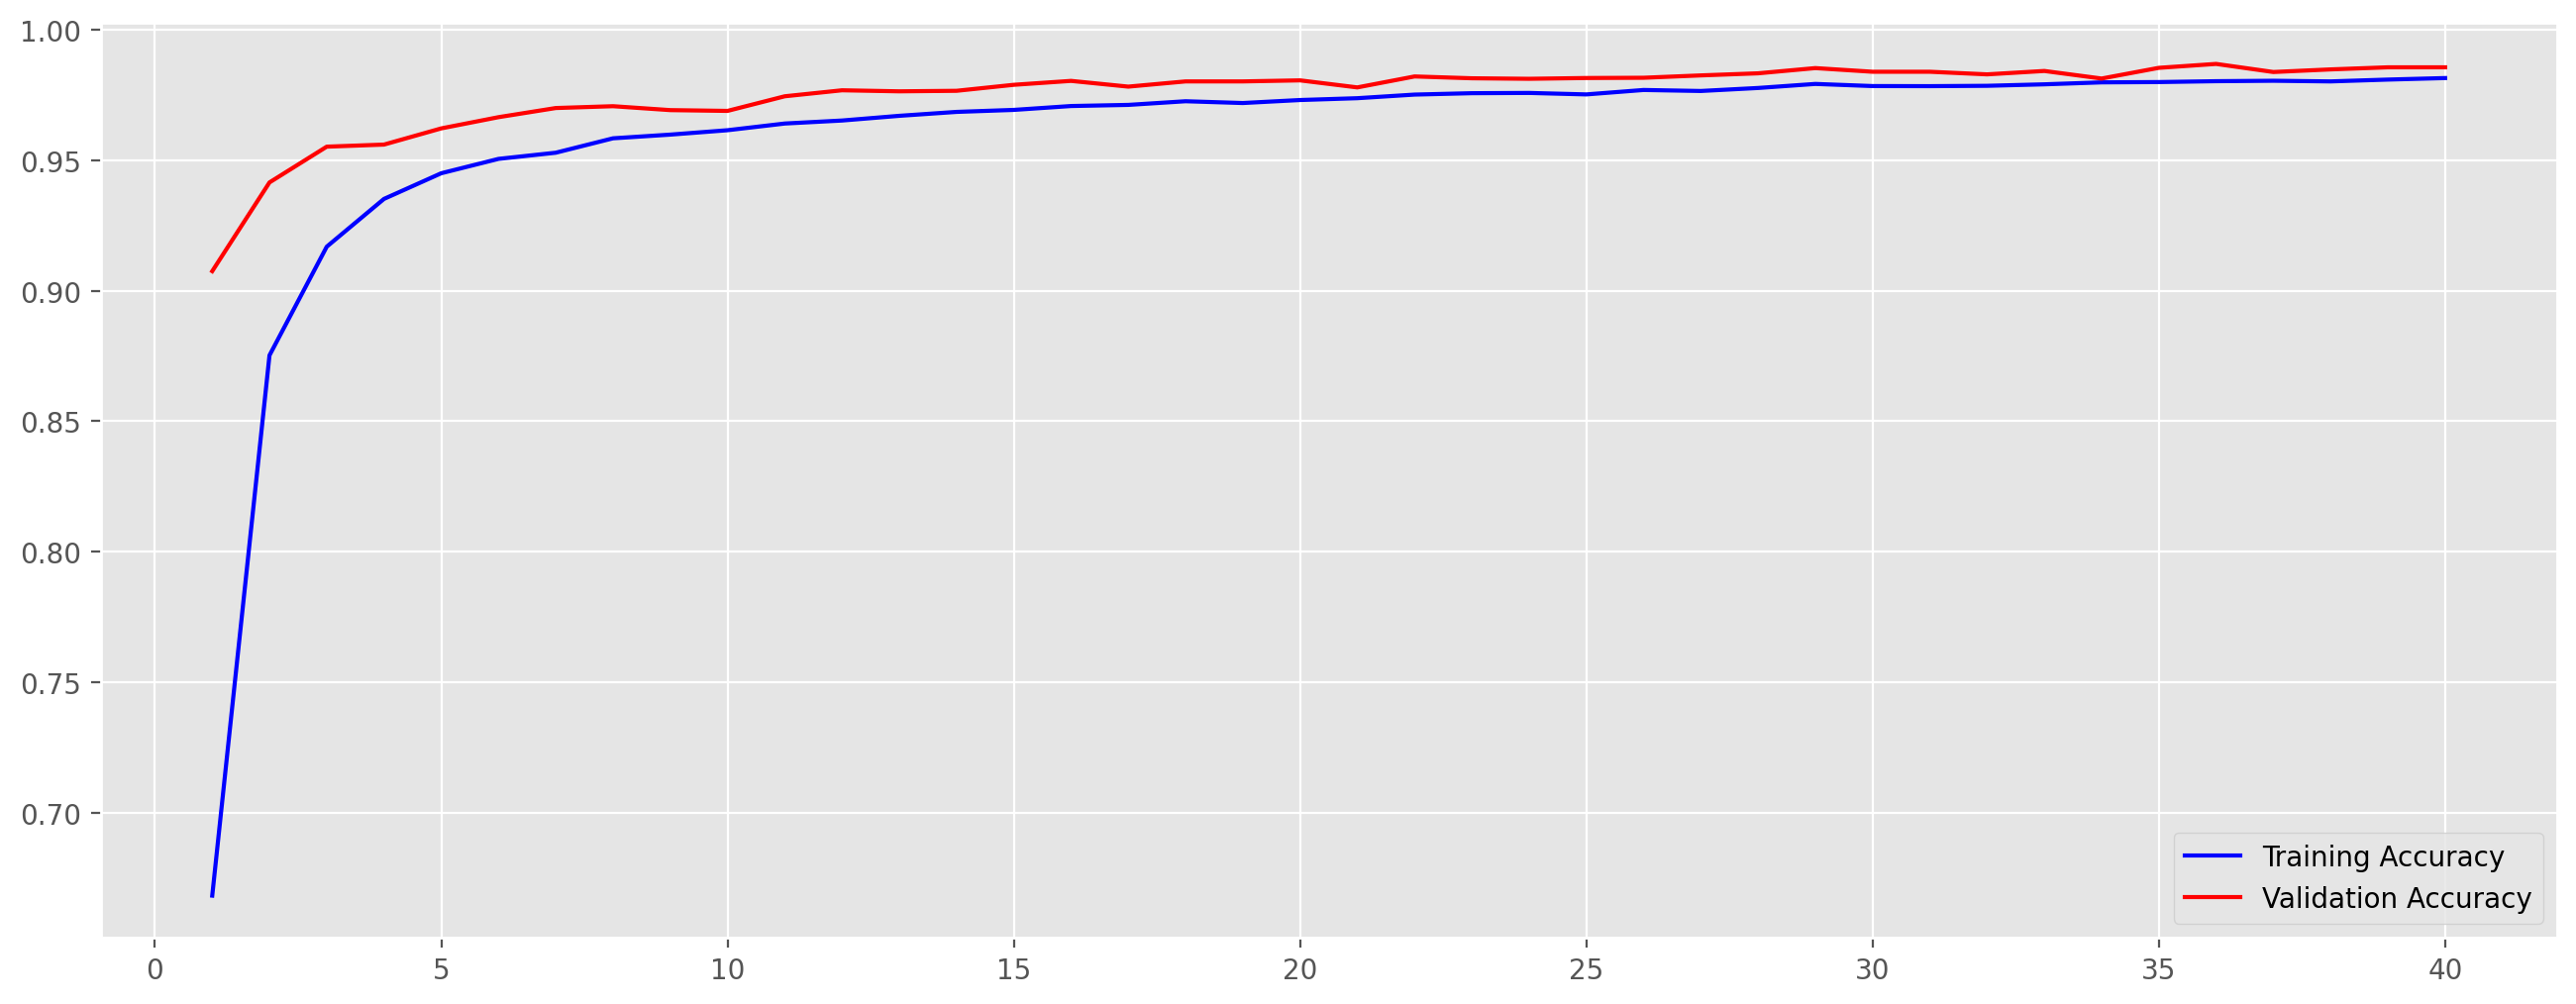

In [13]:
acc_train = history.history['accuracy']
acc_val   = history.history['val_accuracy']
num_epochs = range(1,41)

plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, acc_train, c = 'blue', label = 'Training Accuracy')
plt.plot(num_epochs, acc_val,   c = 'red', label = 'Validation Accuracy')
plt.legend()

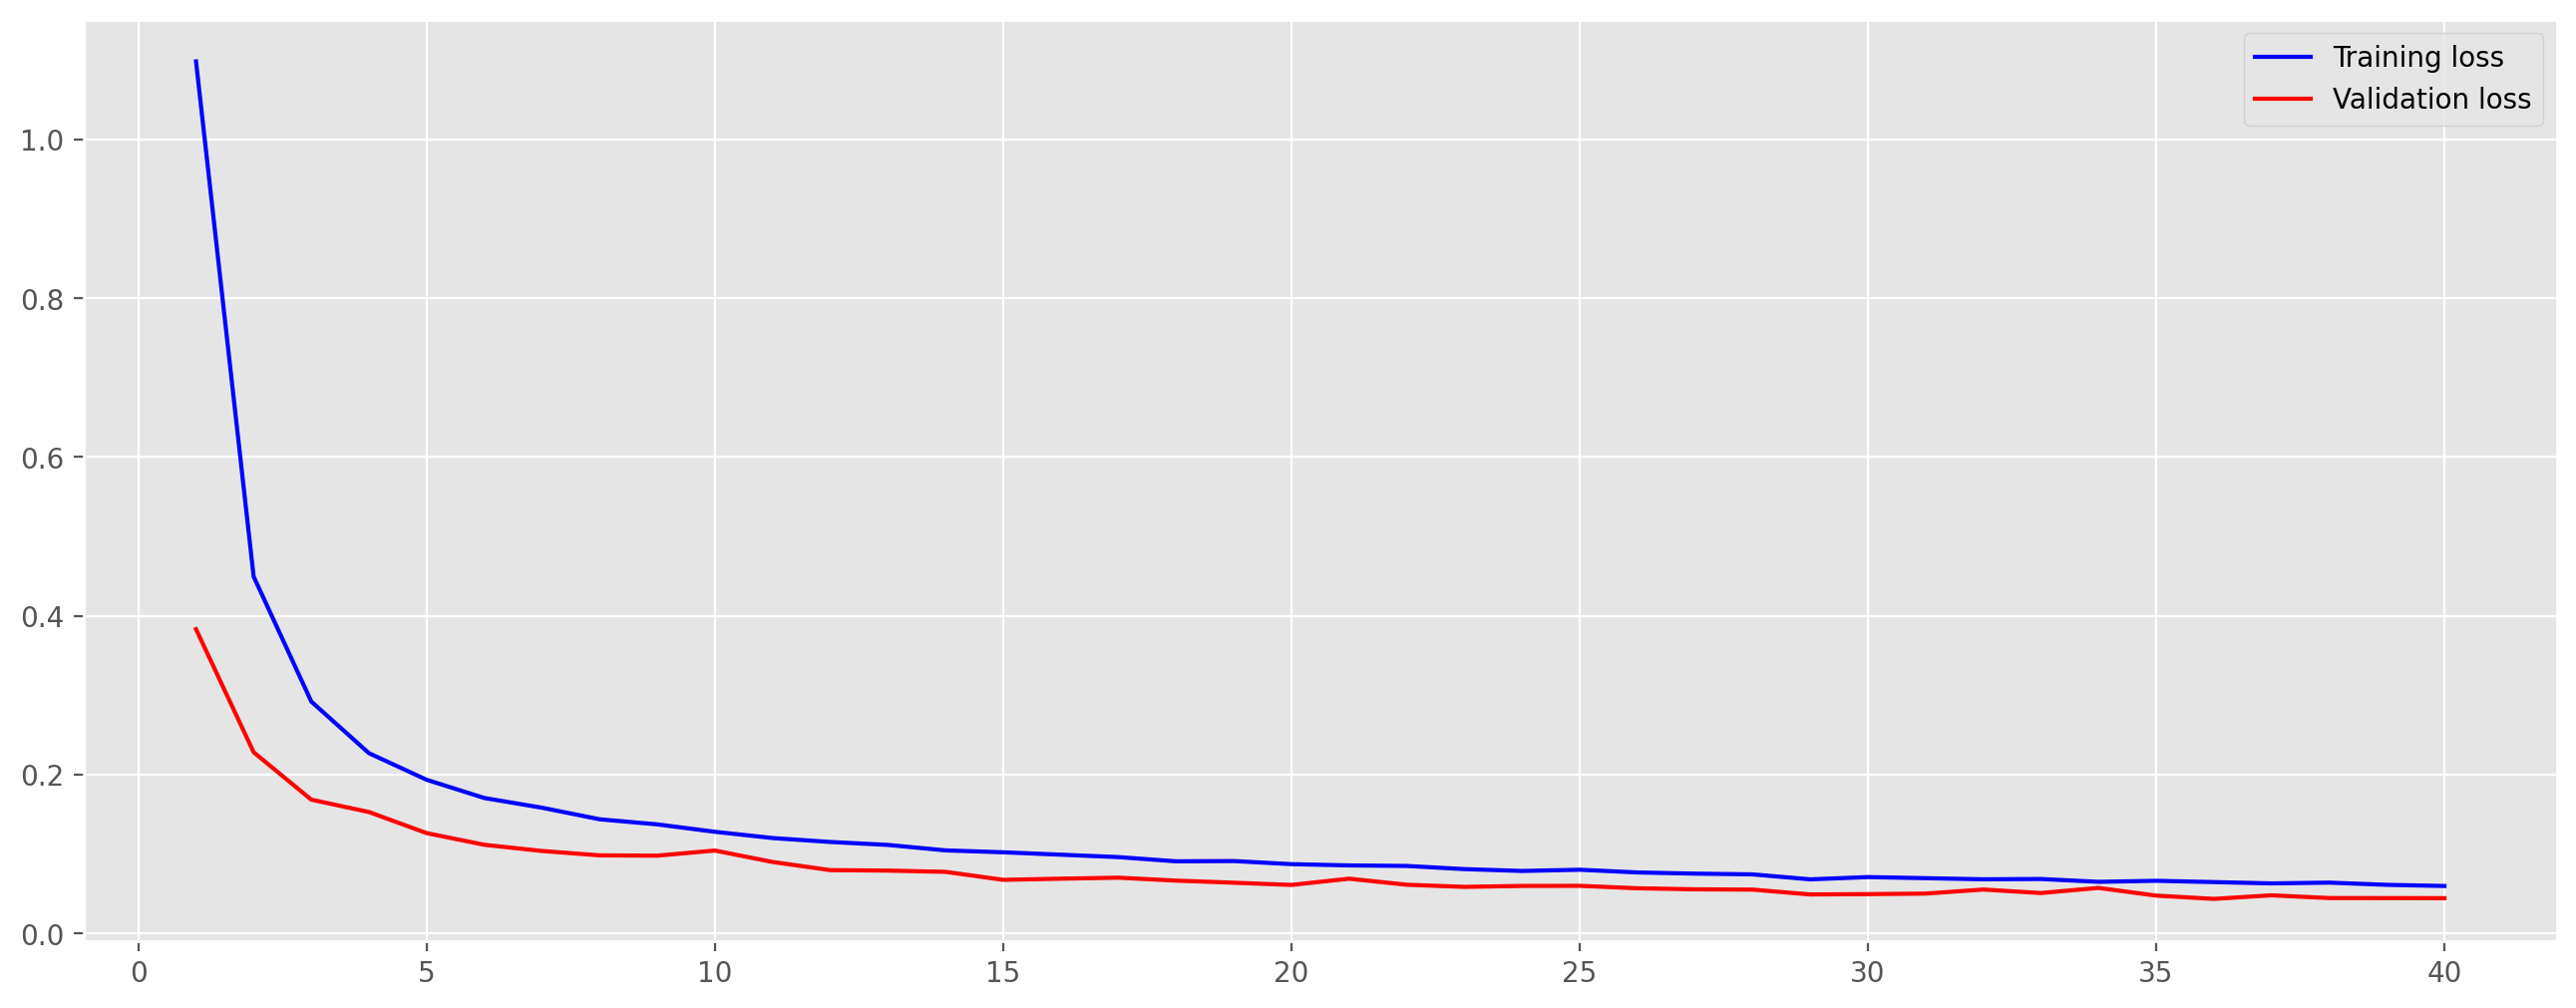

In [16]:
loss_train = history.history['loss']
loss_val   = history.history['val_loss']
num_epochs = range(1,41)

plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, loss_train, c = 'blue', label = 'Training loss')
plt.plot(num_epochs, loss_val,   c = 'red', label = 'Validation loss')
plt.legend()

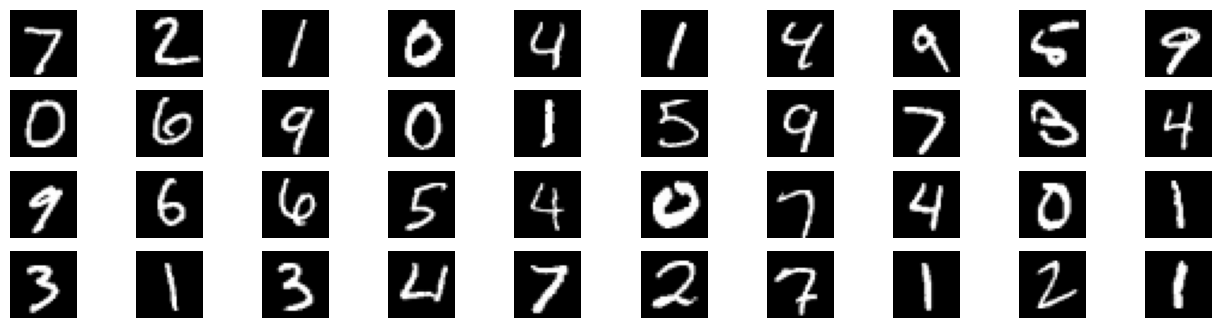

In [17]:
plt.figure(figsize = (16,4))
for i in range(40):
  plt.subplot(4,10,i+1)
  plt.axis('off')
  plt.imshow(x_test[i], cmap = 'gray')

In [18]:
np.set_printoptions(linewidth = 200)
model.predict(x_test[0:1])

1/1 [==============================] - 0s 90ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [19]:
np.argmax(model.predict(x_test[:1]))

1/1 [==============================] - 0s 26ms/step


7

In [20]:
model.predict(x_test[:40])

2/2 [==============================] - 0s 4ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [ ]:
np.argmax(model.predict(x_test[:40]), axis = 1)

2/2 [==============================] - 0s 10ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1])